8×7 DataFrame
 Row │ variable           mean     min     median  max        nmissing  eltype                            
     │ Symbol             Union…   Any     Union…  Any        Int64     Type                              
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ species                     Adelie          Gentoo            0  CategoricalValue{String, UInt32}
   2 │ island                      Biscoe          Torgersen         0  CategoricalValue{String, UInt32}
   3 │ bill_length_mm     43.9219  32.1    44.45   59.6              2  Union{Missing, Float64}
   4 │ bill_depth_mm      17.1512  13.1    17.3    21.5              2  Union{Missing, Float64}
   5 │ flipper_length_mm  200.915  172     197.0   231               2  Union{Missing, Int64}
   6 │ body_mass_g        4201.75  2700    4050.0  6300              2  Union{Missing, Int64}
   7 │ sex                         female          male             11  Uni

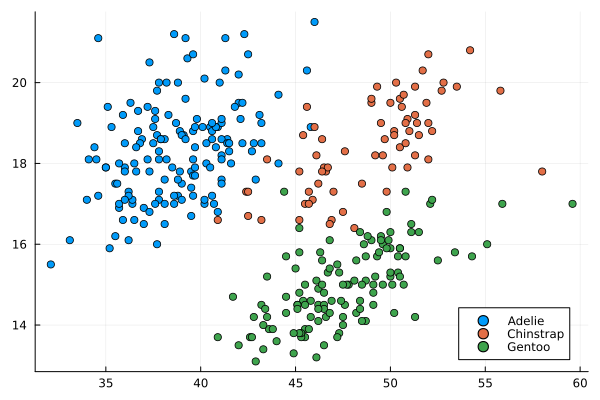

In [45]:
using RCall
using DataFrames
using Plots

# Set CRAN mirror and install package
R"""
options(repos = c(CRAN = "https://cloud.r-project.org"))
if (!require('palmerpenguins')) install.packages('palmerpenguins')
library(palmerpenguins)
"""

# Get the penguins dataset into Julia
penguins = rcopy(R"penguins")

# so data, so adorable
 println(describe(penguins))

# just species
s = penguins[:, :species]

cols = penguins[:, [:species, :island, :sex]]

describe(cols)

reviews_locations = select(penguins, Cols(startswith("bill")))

describe(reviews_locations)

scatter(penguins[:, :bill_length_mm], penguins[:, :bill_depth_mm], group=penguins[:, :species])



In [46]:
#move bill_length_mm to after sex
select(penguins, :species, :island, :sex, :bill_length_mm, :bill_depth_mm, :body_mass_g)

describe(penguins)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,species,,Adelie,,Gentoo,0,"CategoricalValue{String, UInt32}"
2,island,,Biscoe,,Torgersen,0,"CategoricalValue{String, UInt32}"
3,bill_length_mm,43.9219,32.1,44.45,59.6,2,"Union{Missing, Float64}"
4,bill_depth_mm,17.1512,13.1,17.3,21.5,2,"Union{Missing, Float64}"
5,flipper_length_mm,200.915,172,197.0,231,2,"Union{Missing, Int64}"
6,body_mass_g,4201.75,2700,4050.0,6300,2,"Union{Missing, Int64}"
7,sex,,female,,male,11,"Union{Missing, CategoricalValue{String, UInt32}}"
8,year,2008.03,2007,2008.0,2009,0,Int64


In [47]:
using Statistics


describe(penguins)



Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,species,,Adelie,,Gentoo,0,"CategoricalValue{String, UInt32}"
2,island,,Biscoe,,Torgersen,0,"CategoricalValue{String, UInt32}"
3,bill_length_mm,43.9219,32.1,44.45,59.6,2,"Union{Missing, Float64}"
4,bill_depth_mm,17.1512,13.1,17.3,21.5,2,"Union{Missing, Float64}"
5,flipper_length_mm,200.915,172,197.0,231,2,"Union{Missing, Int64}"
6,body_mass_g,4201.75,2700,4050.0,6300,2,"Union{Missing, Int64}"
7,sex,,female,,male,11,"Union{Missing, CategoricalValue{String, UInt32}}"
8,year,2008.03,2007,2008.0,2009,0,Int64


In [48]:
# add a column with median bill length
transform!(penguins, :body_mass_g => median)

select(penguins, :species, :island, :sex, :bill_length_mm, :bill_depth_mm, :body_mass_g => sum => :body_mass_g_summed)

Row,species,island,sex,bill_length_mm,bill_depth_mm,body_mass_g_summed
,Cat…,Cat…,Cat…?,Float64?,Float64?,Missing
1,Adelie,Torgersen,male,39.1,18.7,missing
2,Adelie,Torgersen,female,39.5,17.4,missing
3,Adelie,Torgersen,female,40.3,18.0,missing
4,Adelie,Torgersen,missing,missing,missing,missing
5,Adelie,Torgersen,female,36.7,19.3,missing
6,Adelie,Torgersen,male,39.3,20.6,missing
7,Adelie,Torgersen,female,38.9,17.8,missing
8,Adelie,Torgersen,male,39.2,19.6,missing
9,Adelie,Torgersen,missing,34.1,18.1,missing


In [49]:
# Using select!,  create a 1x1 DataFrame containing the maximum of the bill_depth_mm column
combine(penguins, :bill_depth_mm => maximum)



Row,bill_depth_mm_maximum
,Missing
1,missing


In [58]:
# create column with strings containing float and percent sign
# penguins[!, :randos] = string(rand(100)) * "%"


penguins[!, :randos] = string.(100 .* rand(nrow(penguins))) .* "%"

# now use a function to transform a new column for rando, which drops the % sign and converts to float from randos

transform!(penguins, :randos => (x -> parse.(Float64, chop.(x, tail=1))) => :randos_float)


select!(penguins, Not(:randos))


println(first(penguins, 5))




5×10 DataFrame
 Row │ species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex      year   body_mass_g_median  randos_float 
     │ Cat…     Cat…       Float64?        Float64?       Int64?             Int64?       Cat…?    Int64  Missing             Float64      
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Adelie   Torgersen            39.1           18.7                181         3750  male      2007             missing       57.3674
   2 │ Adelie   Torgersen            39.5           17.4                186         3800  female    2007             missing       66.9587
   3 │ Adelie   Torgersen            40.3           18.0                195         3250  female    2007             missing       52.7288
   4 │ Adelie   Torgersen       missing        missing              missing      missing  missing   2007             missing       12.643
   5 │ Ade

In [60]:
penguin_species = groupby(penguins, :species)

println(first(penguin_species, 5))

# Count the observations per group and rename the column, then sort
sort(combine(penguin_species, nrow => :count), :count, rev = true)

GroupedDataFrame with 3 groups based on key: species
Group 1 (152 rows): species = CategoricalArrays.CategoricalValue{String, UInt32} "Adelie"
 Row │ species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex      year   body_mass_g_median  randos_float 
     │ Cat…     Cat…       Float64?        Float64?       Int64?             Int64?       Cat…?    Int64  Missing             Float64      
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Adelie   Torgersen            39.1           18.7                181         3750  male      2007             missing     57.3674
   2 │ Adelie   Torgersen            39.5           17.4                186         3800  female    2007             missing     66.9587
   3 │ Adelie   Torgersen            40.3           18.0                195         3250  female    2007             missing     52.7288
   4 │ Adelie   Torgersen 

Row,species,count
,Cat…,Int64
1,Adelie,152
2,Gentoo,124
3,Chinstrap,68


In [61]:
#Calculate the median of the flipper_length_mm, culmen_length_mm, and body_mass_g columns.
combine(penguin_species, :flipper_length_mm => median => :flipper_length_mm_median, :culmen_length_mm => median => :culmen_length_mm_median, :body_mass_g => median => :body_mass_g_median)






ArgumentError: ArgumentError: column name :culmen_length_mm not found in the data frame